In [1]:
import csv
import matplotlib.pyplot as plt

In [2]:
f = open("UFC-data/fightmetricclean.csv", "r")

reader = csv.reader(f)

In [3]:
new_metric = []

In [4]:
for row in reader:
    new_row = []
    new_row.append(row[1])
    new_row.append(row[2])
    new_row.append(row[3])
    new_row.append(row[7])
    new_row.append(row[8])
    new_row.append(row[9])
    new_row.append(row[10])
    new_row.append(row[11])
    new_row.append(row[12])
    new_row.append(row[13])
    new_metric.append(new_row)

In [5]:
f.close()

In [6]:
f = open("temp.csv", "w", newline="")

writer = csv.writer(f)

for row in new_metric:
        writer.writerow(row)

f.close()    

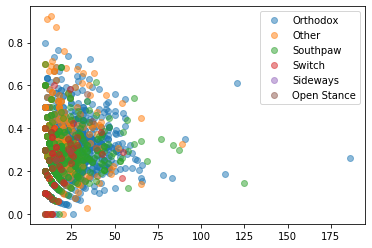

In [8]:
with open("temp.csv", "r") as f:
    f.readline()
    reader = csv.reader(f)

    win_ratios = {
        "Orthodox": {"win_ratio": [], "fight_counts": []},
        "Other": {"win_ratio": [], "fight_counts": []},
        "Southpaw": {"win_ratio": [], "fight_counts": []},
        "Switch": {"win_ratio": [], "fight_counts": []},
        "Sideways": {"win_ratio": [], "fight_counts": []},
        "Open Stance": {"win_ratio": [], "fight_counts": []},
        }

    for row in reader:
        total_fights = int(row[7])
        wins = int(row[5])
        stance = row[3]

        if total_fights >= 10:
            if stance in win_ratios.keys():
                win_ratios[stance]["win_ratio"].append(1 / total_fights * wins)
                win_ratios[stance]["fight_counts"].append(total_fights)
            else:
                win_ratios["Other"]["win_ratio"].append(1 / total_fights * wins)
                win_ratios["Other"]["fight_counts"].append(total_fights)

    for key in win_ratios.keys():
        plt.plot(win_ratios[key]["fight_counts"], win_ratios[key]["win_ratio"], "o",  alpha=0.5, label=key)

    plt.legend(win_ratios.keys())
    plt.show()

# Fighters who use Orthodox are kind of all over but spread into high fight counts
# Fighters who use Other have all over but also high win ratios but have average fight counts
# Fighters who use Southpaw do have average to high fight counts but drop off at a win ratio of about 0.6
# Fighters who use Switch don't fight many fights and don't win many fights
# Fighters who use Sideways, which are few, win less than half of all fights
# Fighters who yse Open Stance, which are few, fight between 20 and 40 fights and win between 20 % and 40 % of fights
